<a href="https://colab.research.google.com/github/ingridpacheco/Risk-Analysis/blob/master/Lista05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
generateInfo <- function(id) {
  csvName <- "PETR4.SA.csv"
  if (id == "VALE") {
    csvName <- "VALE.csv"
  }
  if (id == "ITUB") {
    csvName <- "ITUB.csv"
  }
  values<-read.csv(csvName,sep=';',dec=',')
  plot(values$Close,type='l')
  lnClose<-log(values$Close)
  retCC<-diff(lnClose)
  hist(retCC)
  mu<-mean(retCC)
  sigma<-sd(retCC)
  c(lnClose[1],mu,sigma)
}

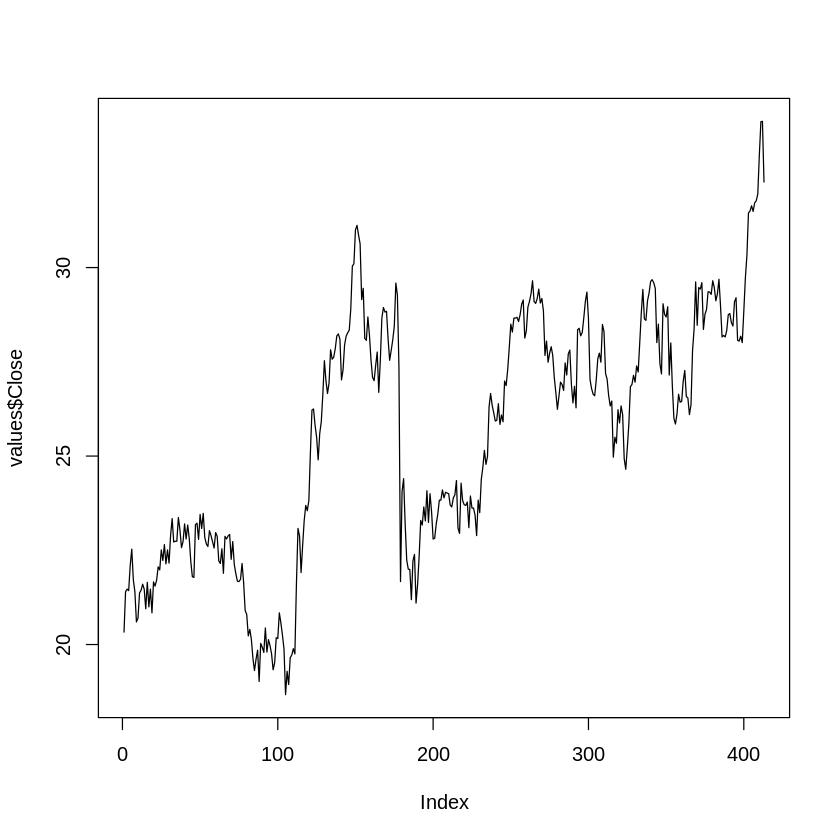

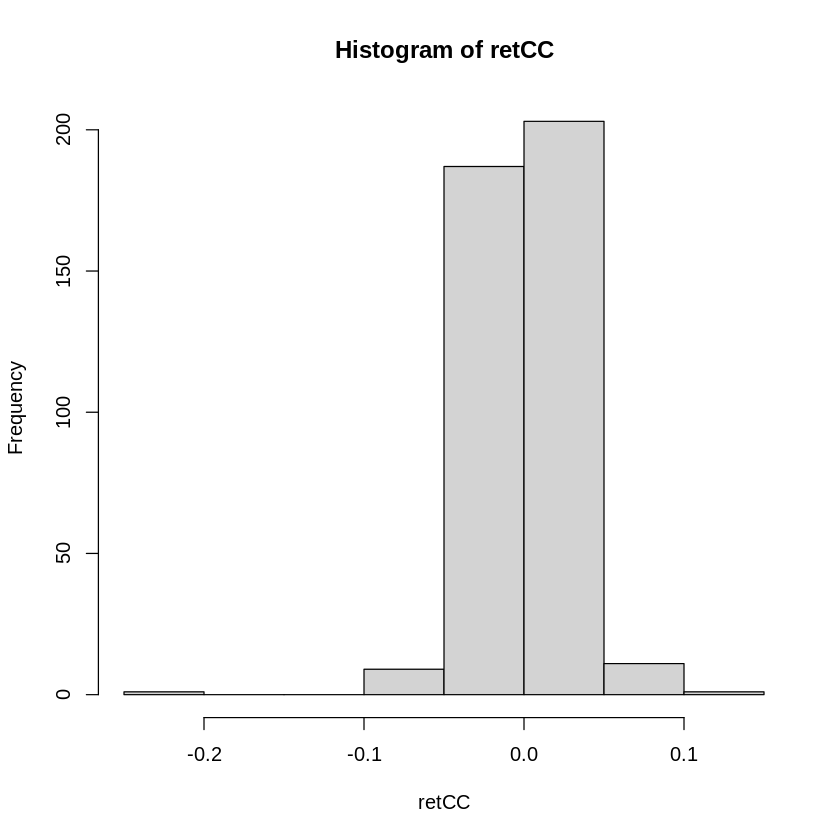

In [7]:
# Calculate Petrobras
petro <- generateInfo("PETR4")

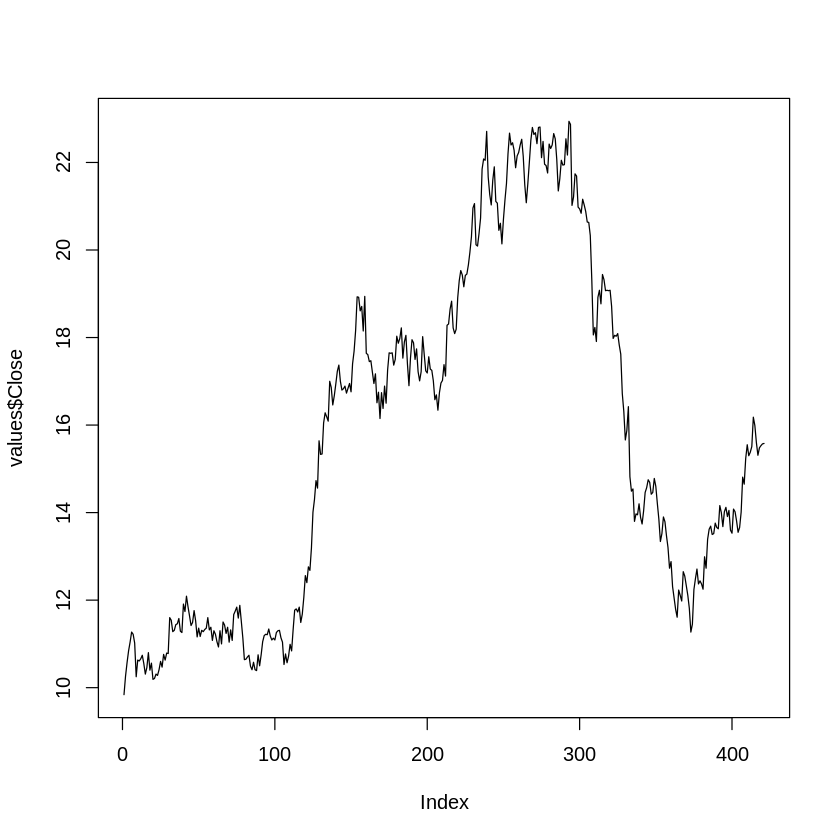

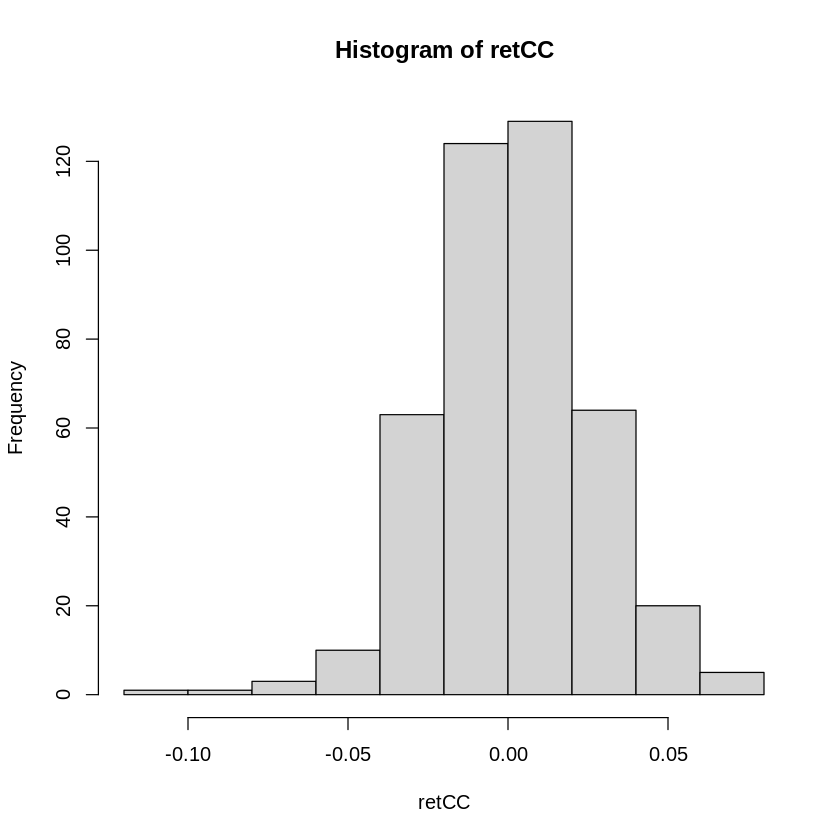

In [8]:
# Calculate Vale
vale <- generateInfo("VALE")

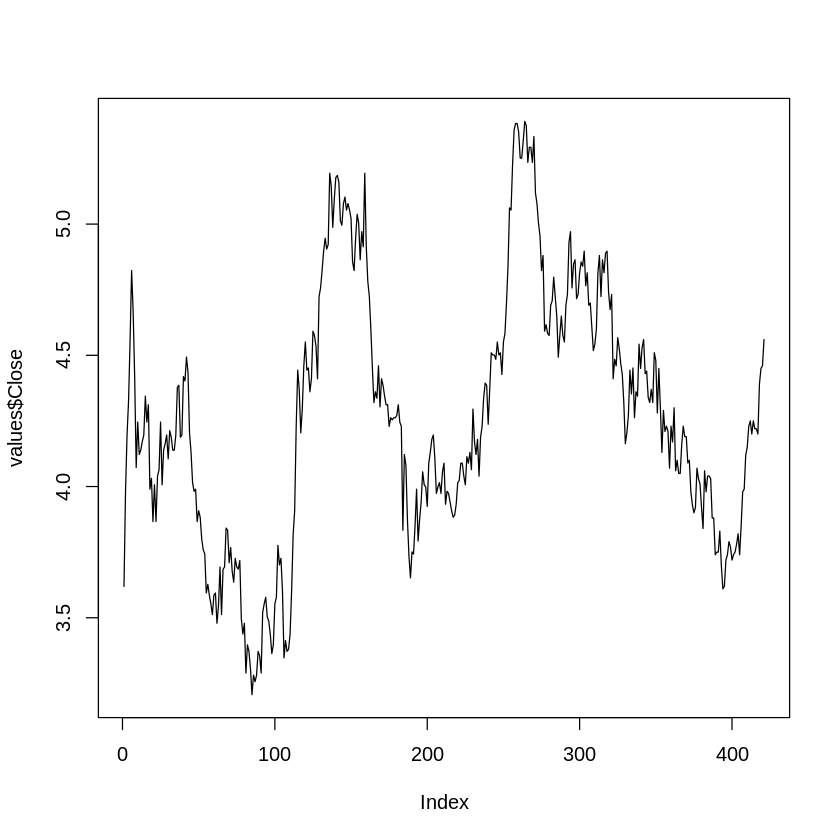

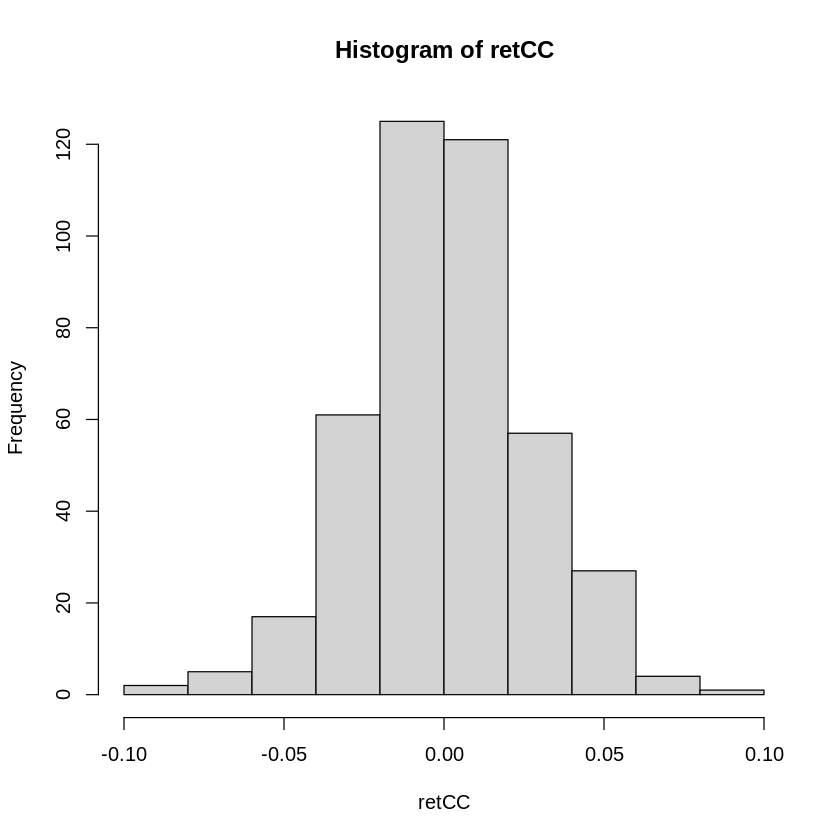

In [9]:
# Calculate Itau
Itau <- generateInfo("ITUB")

In [27]:
q1 <- function(id, day, Ns=1000) {
  stock <- generateInfo(id)
  today <- stock[1]
  mu <- stock[2]
  print(mu)
  sigma <- stock[3]
  print(sigma)
  retEst<-vector(length = day)
  valEndDay<-vector(length = Ns)
  for(j in 1:Ns){
    retEst[1]<-today
    for ( i in 2:day){
      retEst[i]<-retEst[i-1]+rnorm(1,mu,sigma)
    }
    #in this case, save only last element of path
    valEndDay[j]<-retEst[day]
  }
  
  priceEndDay<-exp(valEndDay)
  hist(priceEndDay)
  plot(ecdf(priceEndDay))
}

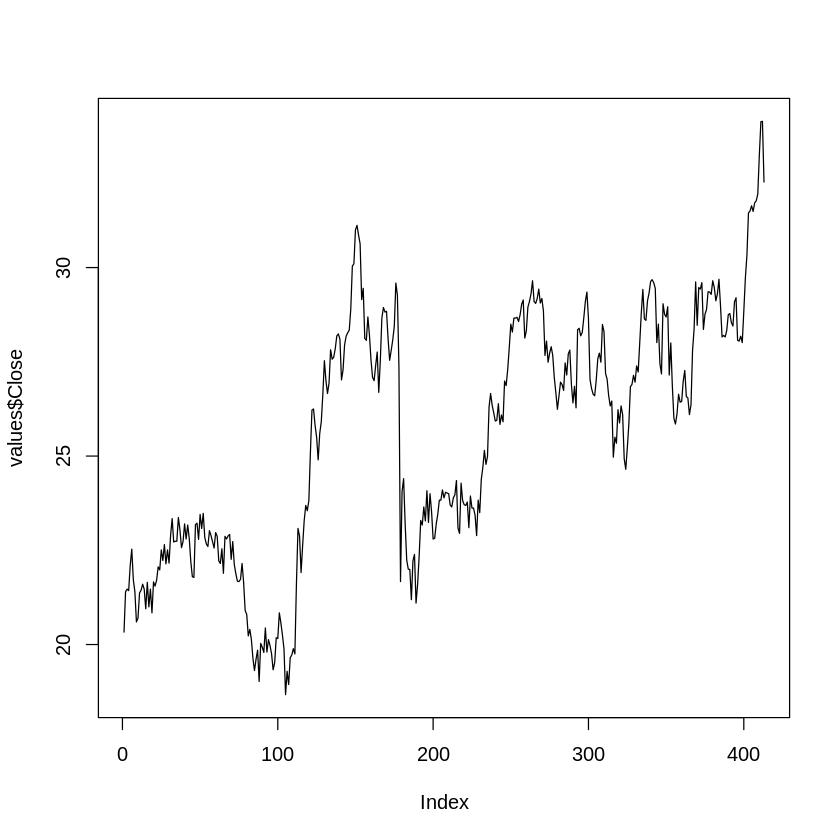

[1] 0.001121457
[1] 0.02680079


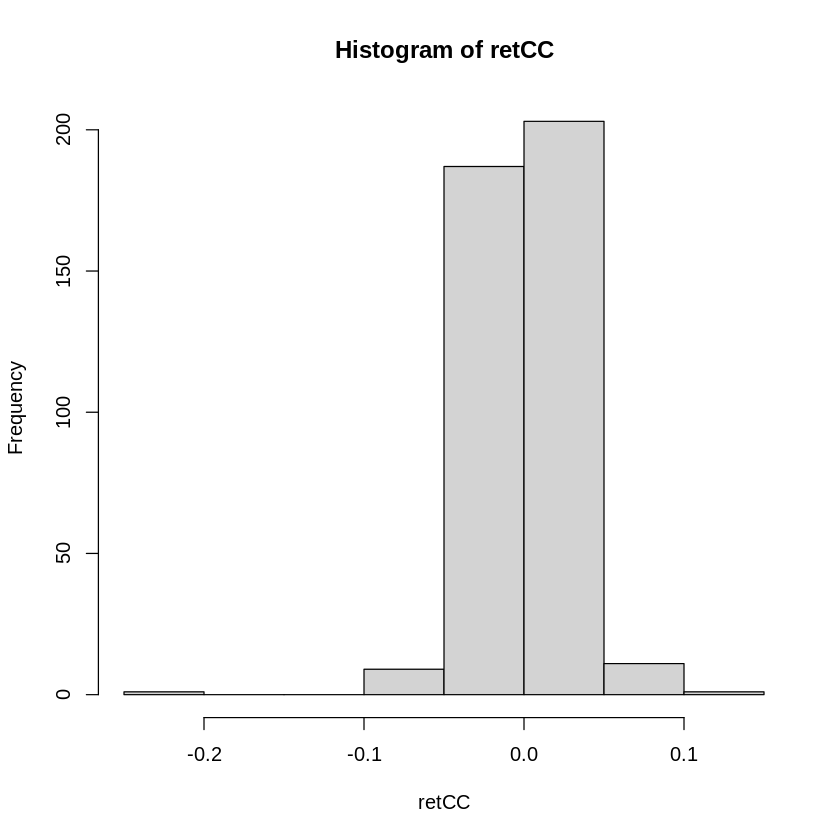

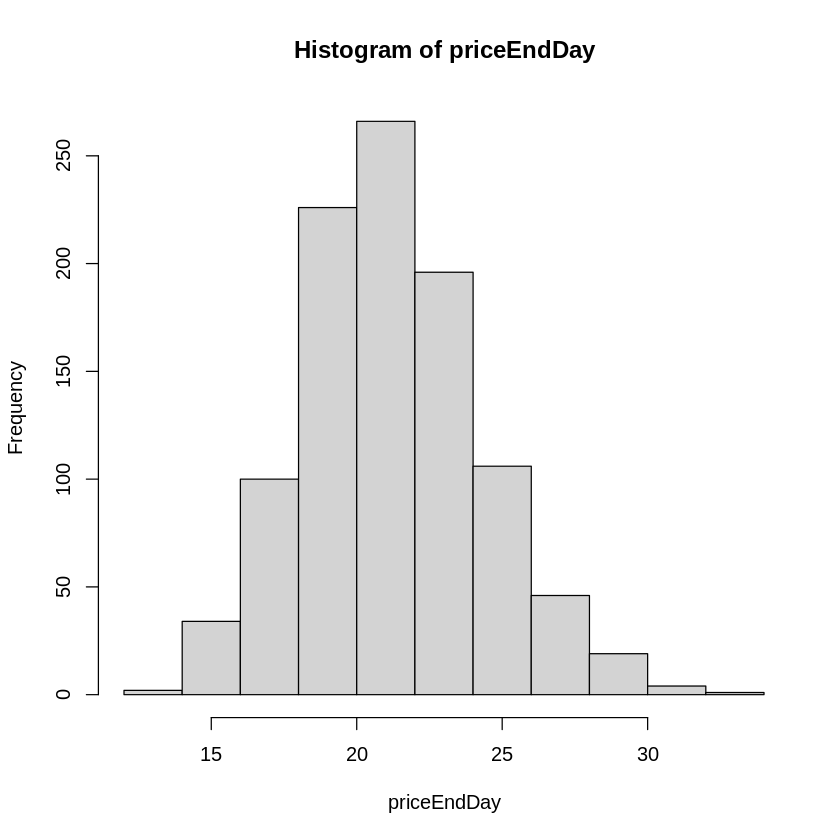

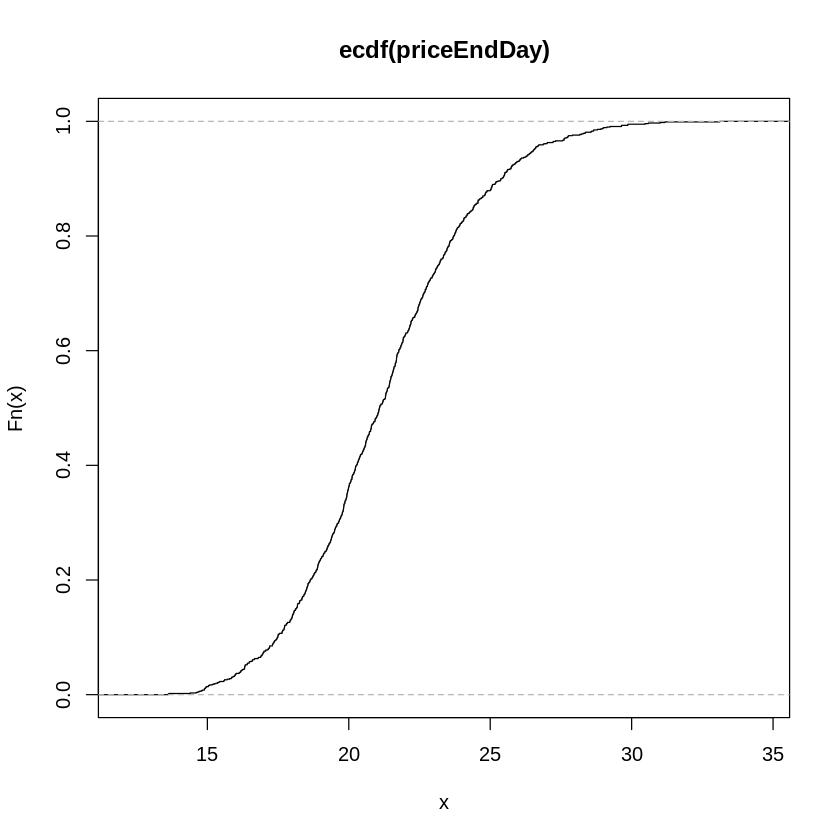

In [28]:
q1("PETR4",30)